# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [2]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

import scipy.sparse

def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    if scipy.sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [3]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [4]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/gNNpgpo6gATjuxTE7CCp.h5ad')
#adata = sc.read_h5ad('../data/gNNpgpo6gATjuxTE7CCp.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 51370 × 23149
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype

In [5]:
CELLTYPES = [
"retinal rod cell",
"Mueller cell",
"amacrine cell",
"ON-bipolar cell",
"rod bipolar cell",
"retinal cone cell",
"retina horizontal cell",
"retinal ganglion cell",
"astrocyte",
"microglial cell",
]

In [6]:
adata.obs.cell_type.unique()

['retinal ganglion cell', 'retinal cone cell', 'amacrine cell', 'astrocyte', 'microglial cell', ..., 'retina horizontal cell', 'Mueller cell', 'OFF-bipolar cell', 'rod bipolar cell', 'ON-bipolar cell']
Length: 11
Categories (11, object): ['astrocyte', 'microglial cell', 'amacrine cell', 'retinal cone cell', ..., 'retina horizontal cell', 'ON-bipolar cell', 'OFF-bipolar cell', 'rod bipolar cell']

(51281, 23149)
(51281, 23149)
Yio
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.4195748120546341 mse_loss: 0.39434665627777576 kl_loss: 0.024788455662928754 sparse_loss: 0.0004397100547066657
epoch: 2 0.3771960400044918 mse_loss: 0.35102948173880577 kl_loss: 0.025639471627073362 sparse_loss: 0.0005270958063192666
epoch: 4 0.10751334484666586 mse_loss: 0.07763758022338152 kl_loss: 0.029318770277313888 sparse_loss: 0.000556996077648364
epoch: 5 0.10663207527250051 mse_loss: 0.07654337305575609 kl_loss: 0.029521144489990547 sparse_loss: 0.000567558945476776
epoch: 7 0.09847110835835338 mse_loss: 0.06781054427847266 kl_loss: 0.030086500220932066 sparse_loss: 0.0005740655687986873
epoch: 8 0.09841017704457045 mse_loss: 0.06766951363533735 kl_loss: 0.030162854556692764 sparse_loss: 0.0005778115737484768
epoch: 10 0.09213623823598027 mse_loss: 0.06117714894935489 kl_loss: 0.03037788238725625 sparse_loss: 0.0005812094896100461
epoch: 11 0.09215721115469933 mse_loss: 0.06114338035695255 kl_loss: 0.03042949183145538 sparse_loss: 0.0005843419821758289
epoch: 13 0.

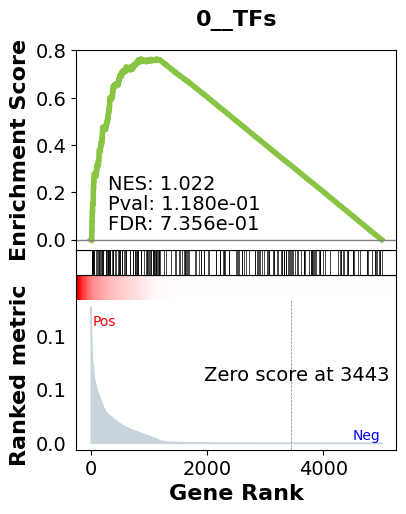

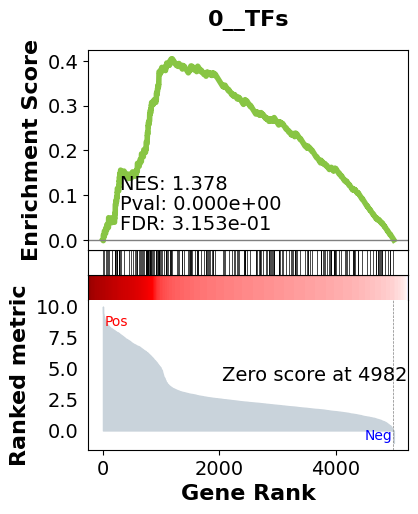

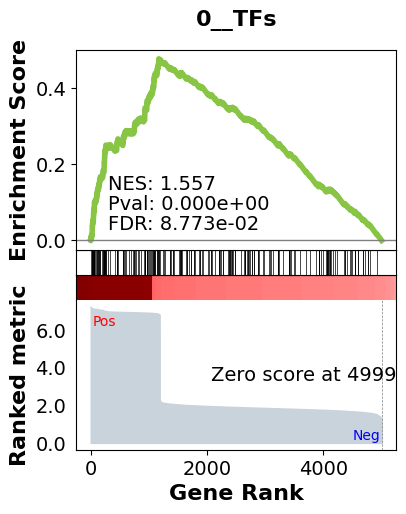

_________________________________________
TF specific enrichment
found some significant results for  40.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1695 genes
intersection pct: 0.339
precision:  0.00023413490105341032 
recall:  1.0 
random precision: 0.00023413490105341032


 94%|█████████▍| 120/128 [00:01<00:00, 83.29it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 83.17it/s]


Average Precision (AP):  0.00036078737545547097
Area Under Precision-Recall Curve (AUPRC):  0.0003395988072109257
EPR: 5.137228700536243


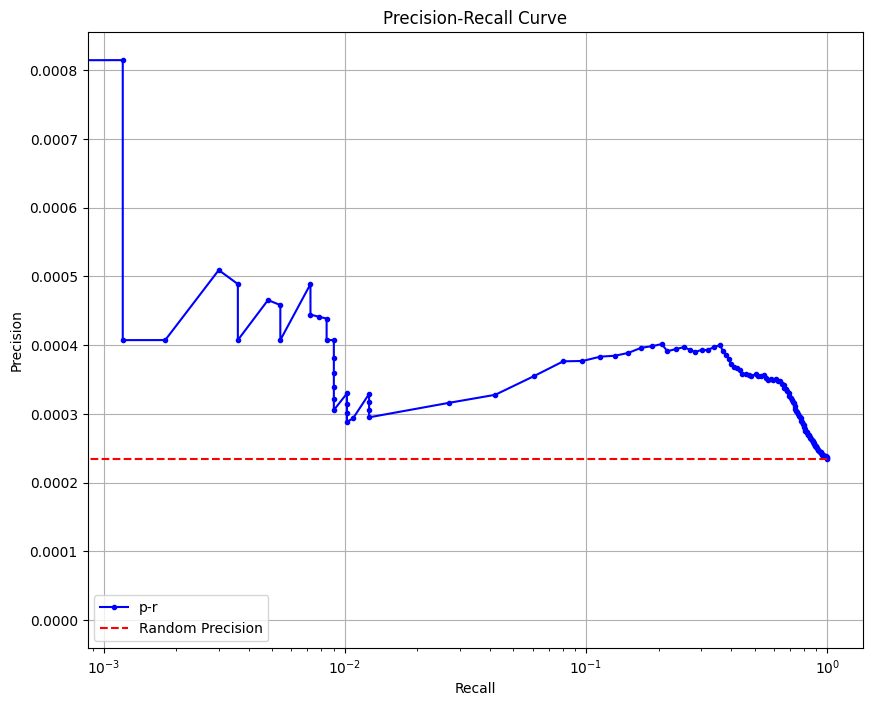

base enrichment
Top central genes: []


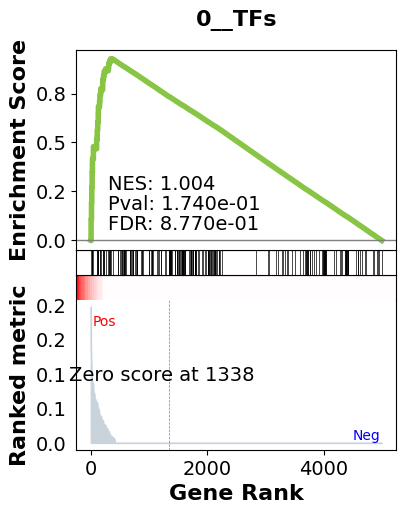

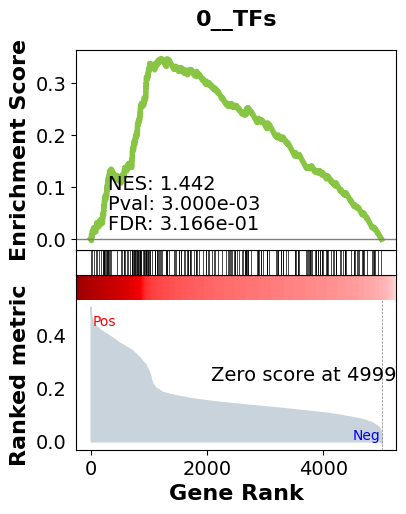

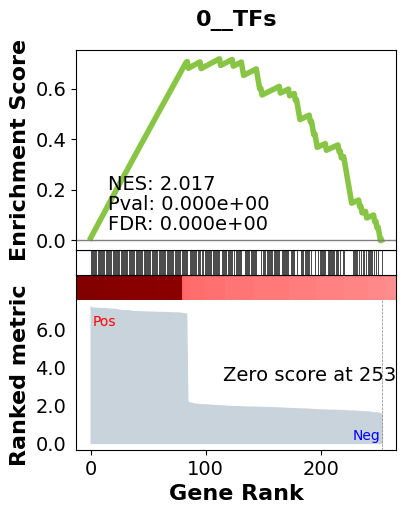

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1695 genes
intersection pct: 0.339
precision:  0.0011988180376535501 
recall:  0.41836734693877553 
random precision: 0.00023413490105341032


 95%|█████████▌| 122/128 [00:01<00:00, 87.17it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 87.36it/s]


Average Precision (AP):  0.0008986041054746377
Area Under Precision-Recall Curve (AUPRC):  0.0008905596521190756
EPR: 5.137228700536243


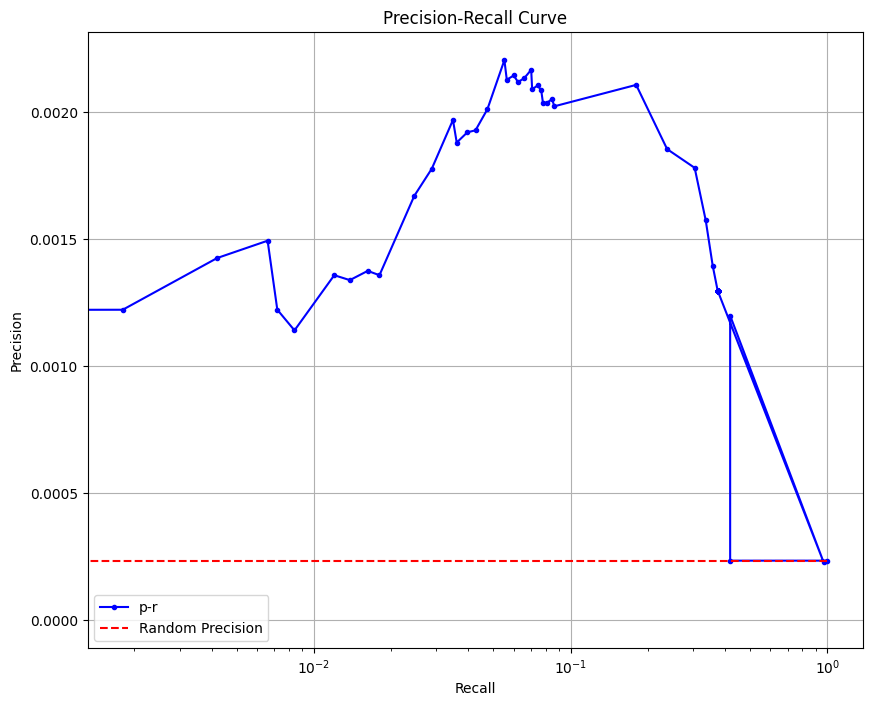

(51281, 23149)
HYZ
save dir exist
epoch: 1 0.2471138183027506 mse_loss: 0.20993034541606903 kl_loss: 0.03644585030269809 sparse_loss: 0.000737618671337259
epoch: 2 0.21576820965856314 mse_loss: 0.17373823188245296 kl_loss: 0.04104700149036944 sparse_loss: 0.0009829711052589118
epoch: 4 0.10896466113626957 mse_loss: 0.06023826845921576 kl_loss: 0.047665698919445276 sparse_loss: 0.0010606947835185565
epoch: 5 0.10863704234361649 mse_loss: 0.05907783843576908 kl_loss: 0.04846787895075977 sparse_loss: 0.0010913284058915451
epoch: 7 0.10216047987341881 mse_loss: 0.051895294804126024 kl_loss: 0.04916220216546208 sparse_loss: 0.0011029839588445611
epoch: 8 0.10225935792550445 mse_loss: 0.05195877095684409 kl_loss: 0.04919586598407477 sparse_loss: 0.0011047248335671611
epoch: 10 0.0964933573268354 mse_loss: 0.04605980613268912 kl_loss: 0.04932786349672824 sparse_loss: 0.0011056901785195805
epoch: 11 0.09669969510287046 mse_loss: 0.04627031763084233 kl_loss: 0.04932332830503583 sparse_loss: 0.0

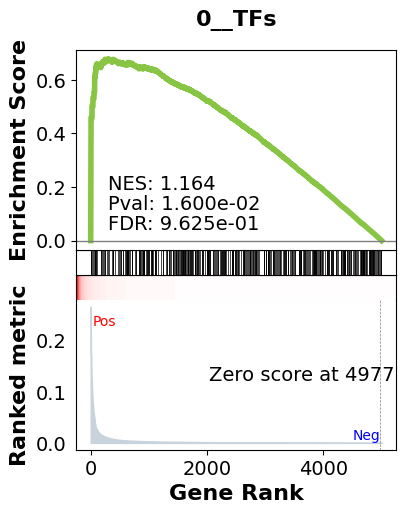

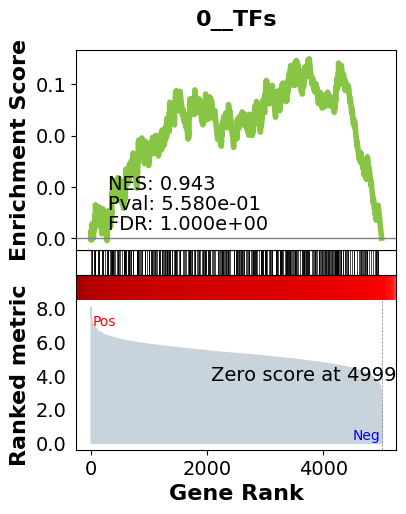

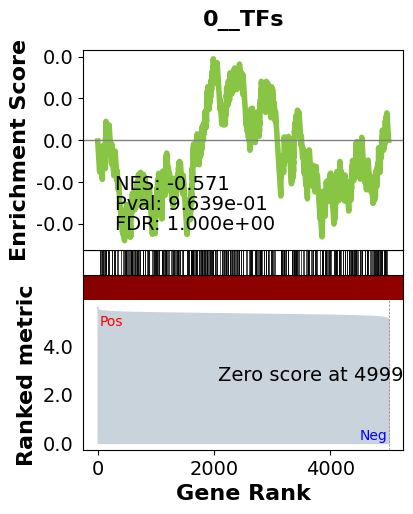

_________________________________________
TF specific enrichment
found some significant results for  15.517241379310345 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3634 genes
intersection pct: 0.7268
precision:  0.0013763487968252858 
recall:  0.9998349290194783 
random precision: 0.001376576029580251


 98%|█████████▊| 126/128 [00:02<00:00, 49.79it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.73it/s]


Average Precision (AP):  0.0015633849945929131
Area Under Precision-Recall Curve (AUPRC):  0.0014799303216485483
EPR: 2.9739249473459295


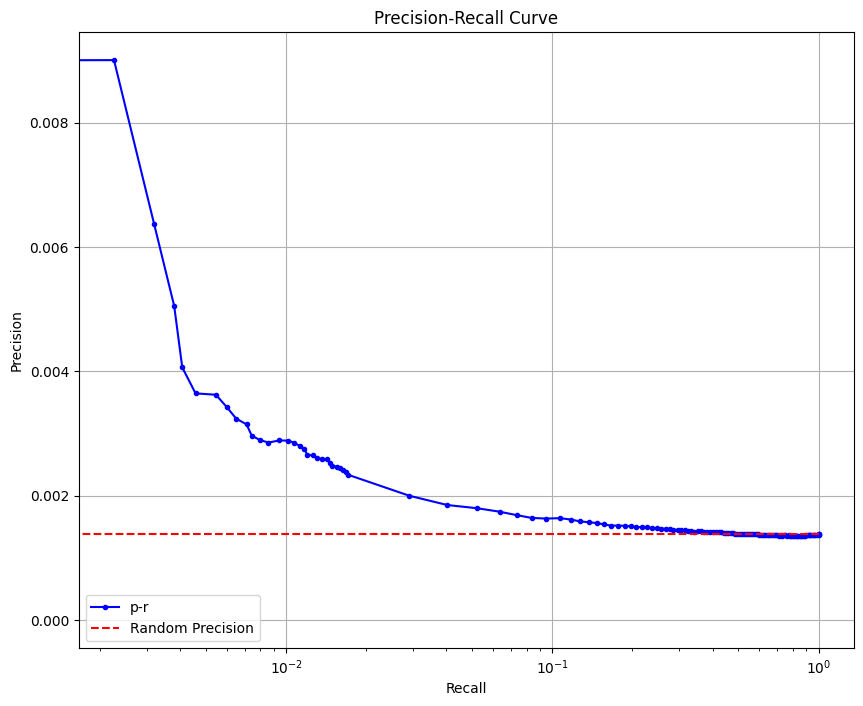

base enrichment
Top central genes: []


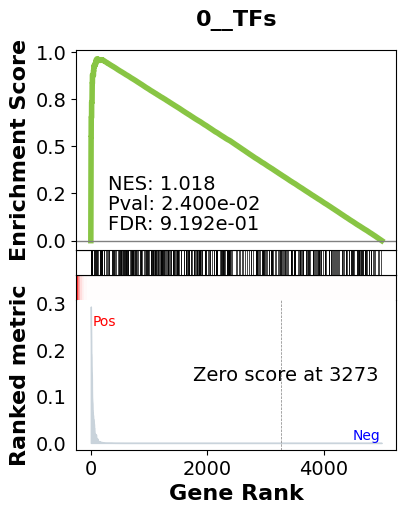

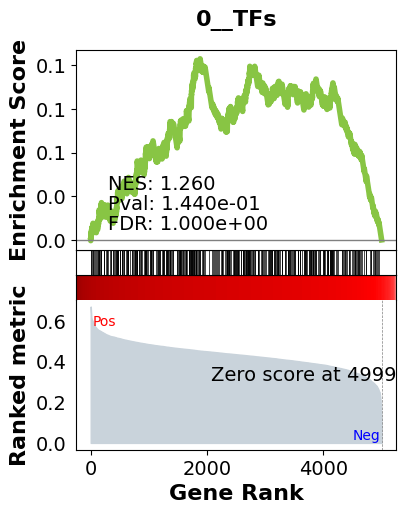

_________________________________________
TF specific enrichment
found some significant results for  3.4482758620689653 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3634 genes
intersection pct: 0.7268
precision:  0.006062579717224348 
recall:  0.4302299988995268 
random precision: 0.001376576029580251


 98%|█████████▊| 126/128 [00:02<00:00, 50.25it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.01it/s]


Average Precision (AP):  0.0044742566014687015
Area Under Precision-Recall Curve (AUPRC):  0.003729148452994276
EPR: 9.19522621465035


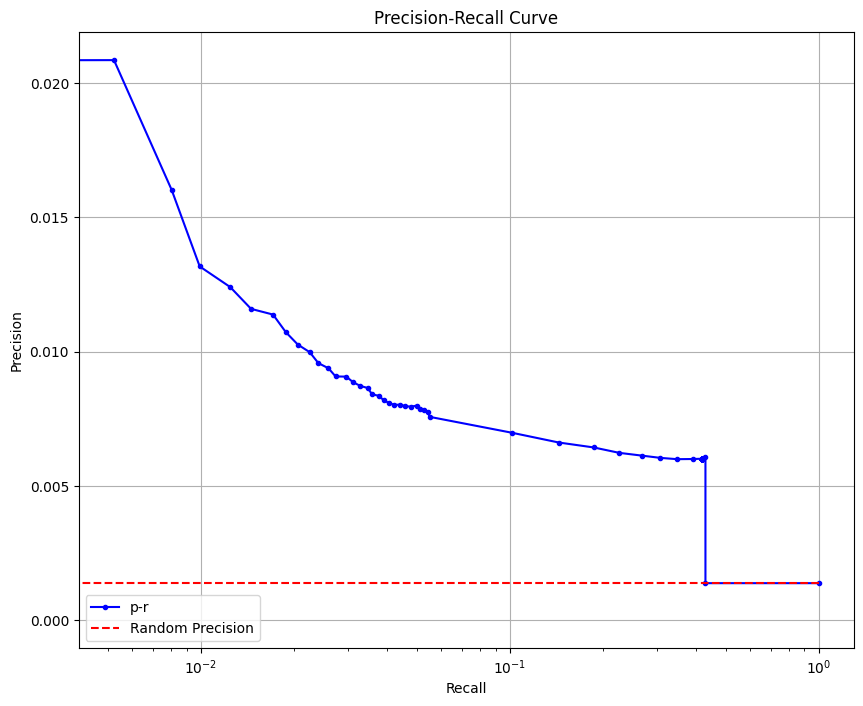

(51281, 23149)
0Va
save dir exist
epoch: 1 0.3662602100521326 mse_loss: 0.3326266836374998 kl_loss: 0.032869537273654714 sparse_loss: 0.0007639935429324396
epoch: 2 0.3279278464615345 mse_loss: 0.28948523569852114 kl_loss: 0.03738949808757752 sparse_loss: 0.001053121824952541
epoch: 4 0.10419947048649192 mse_loss: 0.05470434692688286 kl_loss: 0.048352283891290426 sparse_loss: 0.001142842353146989
epoch: 5 0.10415191808715463 mse_loss: 0.053886071778833866 kl_loss: 0.04909509851131588 sparse_loss: 0.001170748786535114
epoch: 7 0.09821388963609934 mse_loss: 0.04694580310024321 kl_loss: 0.05008753028232604 sparse_loss: 0.0011805588292190805
epoch: 8 0.09777560597285628 mse_loss: 0.04653889266774058 kl_loss: 0.05005634017288685 sparse_loss: 0.001180375082185492
epoch: 10 0.09421227406710386 mse_loss: 0.042844564421102405 kl_loss: 0.050189847010187805 sparse_loss: 0.001177863661723677
epoch: 11 0.09533236222341657 mse_loss: 0.04411592963151634 kl_loss: 0.05004241969436407 sparse_loss: 0.001

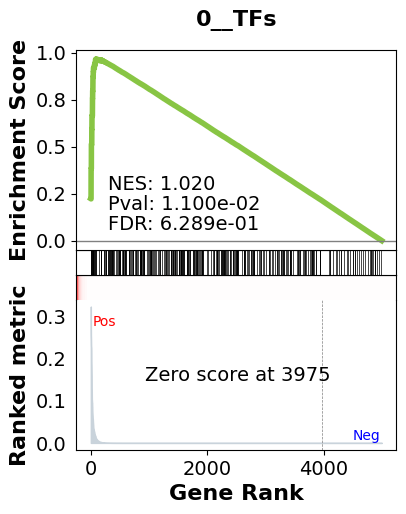

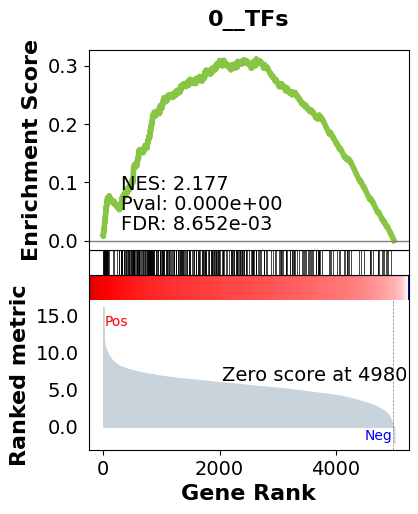

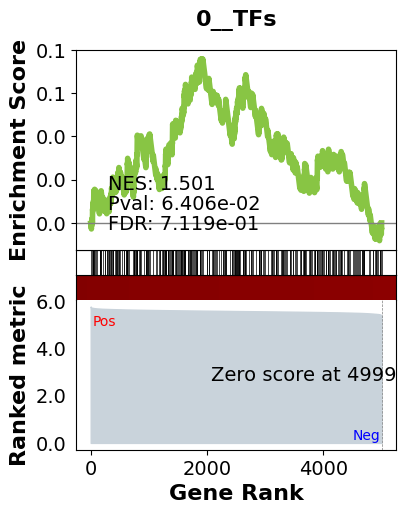

_________________________________________
TF specific enrichment
found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3599 genes
intersection pct: 0.7198
precision:  0.0008199733080077058 
recall:  0.9997175407212127 
random precision: 0.0008202049825155249


 98%|█████████▊| 126/128 [00:02<00:00, 50.75it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.78it/s]


Average Precision (AP):  0.0008256440841985895
Area Under Precision-Recall Curve (AUPRC):  0.0008217403748071882
EPR: 1.9545197085830974


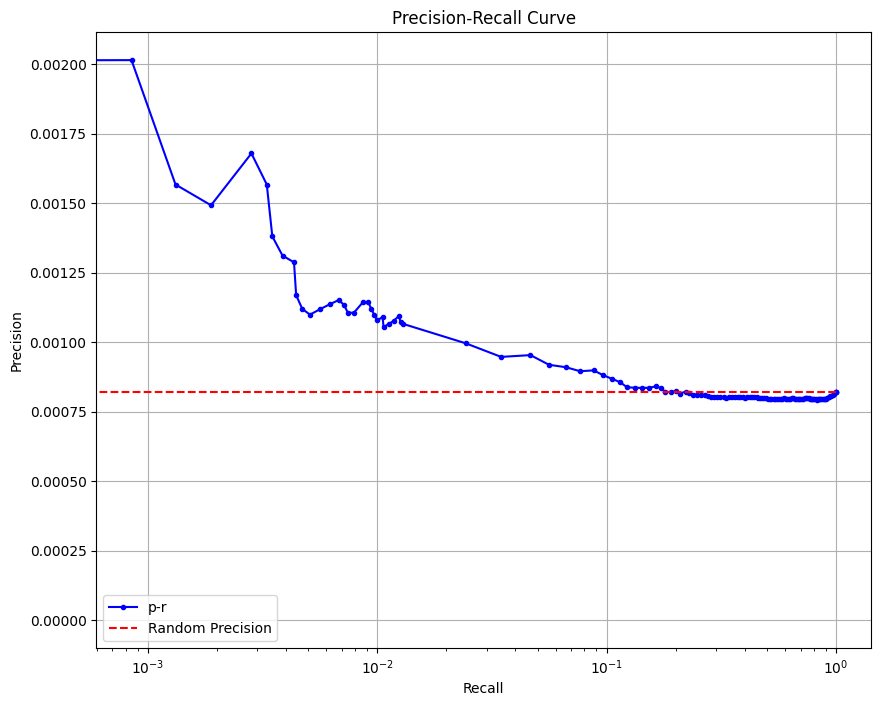

base enrichment
Top central genes: []


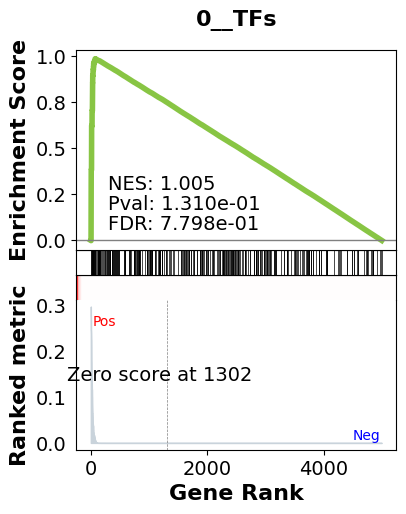

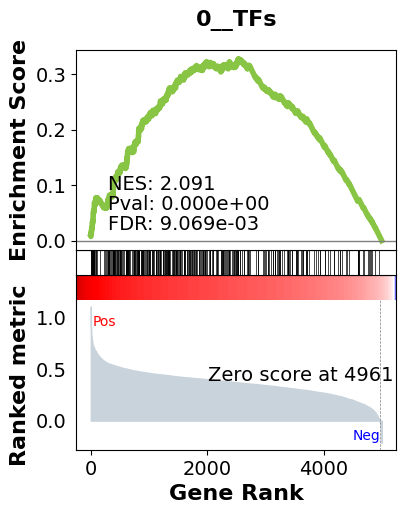

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3599 genes
intersection pct: 0.7198
precision:  0.002894634134803023 
recall:  0.2765276339327747 
random precision: 0.0008202049825155249


 98%|█████████▊| 126/128 [00:02<00:00, 43.25it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.21it/s]


Average Precision (AP):  0.0016043537928820163
Area Under Precision-Recall Curve (AUPRC):  0.001443705751526198
EPR: 6.603132091070801


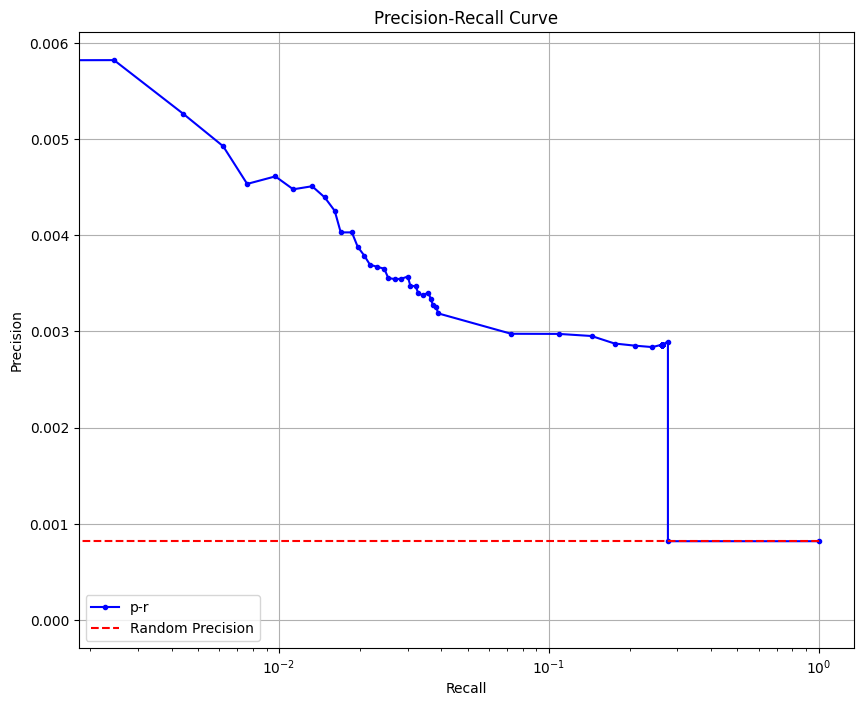

(51281, 23149)
yqt
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.4157606866210699 mse_loss: 0.3773034196346998 kl_loss: 0.03775285309529863 sparse_loss: 0.0007044222365948372
epoch: 2 0.3962543699890375 mse_loss: 0.3511388171464205 kl_loss: 0.04422556795179844 sparse_loss: 0.0008899918029783294
epoch: 4 0.17471718601882458 mse_loss: 0.12650348944589496 kl_loss: 0.047262301901355386 sparse_loss: 0.000951387712120777
epoch: 5 0.17445964459329844 mse_loss: 0.12506520887836814 kl_loss: 0.048407959286123514 sparse_loss: 0.0009864727253443561
epoch: 7 0.15960442554205656 mse_loss: 0.10962624894455075 kl_loss: 0.048978648614138365 sparse_loss: 0.000999522555503063
epoch: 8 0.15919076651334763 mse_loss: 0.1090643098577857 kl_loss: 0.04912250314373523 sparse_loss: 0.001003946890705265
epoch: 10 0.14688984025269747 mse_loss: 0.09677061578258872 kl_loss: 0.04911181936040521 sparse_loss: 0.001007403428957332
epoch: 11 0.14723879098892212 mse_loss: 0.09703164082020521 kl_loss: 0.049197045154869556 sparse_loss: 0.0010101016305270605
epoch: 13 0.1359256

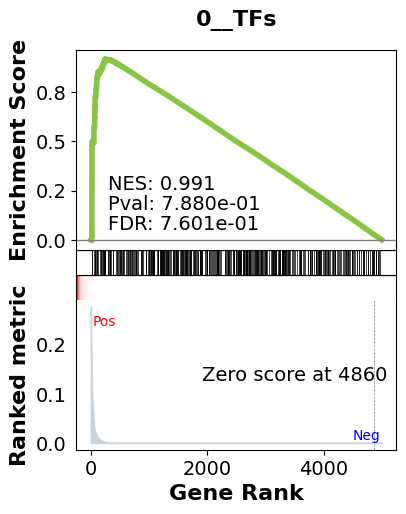

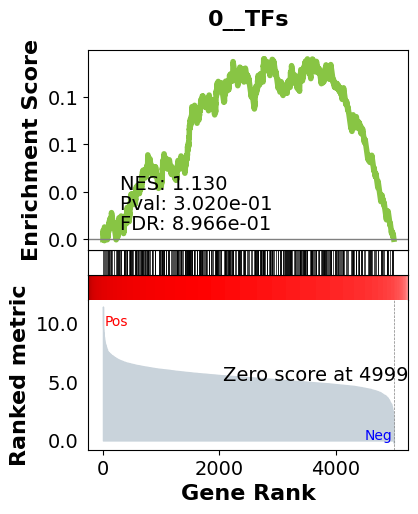

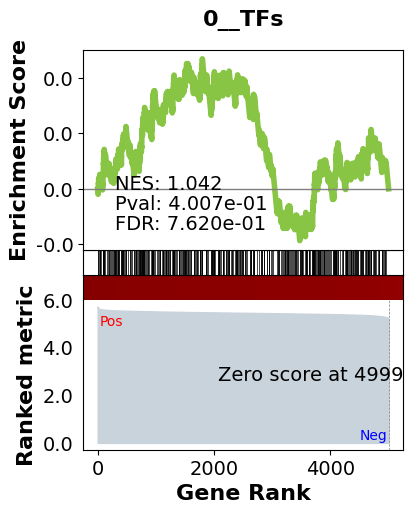

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0007674355934604475 
recall:  0.999884352954782 
random precision: 0.0007675243553842805


 98%|█████████▊| 126/128 [00:02<00:00, 55.49it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.62it/s]


Average Precision (AP):  0.0008396740342176526
Area Under Precision-Recall Curve (AUPRC):  0.0008375021094176513
EPR: 3.022854820983918


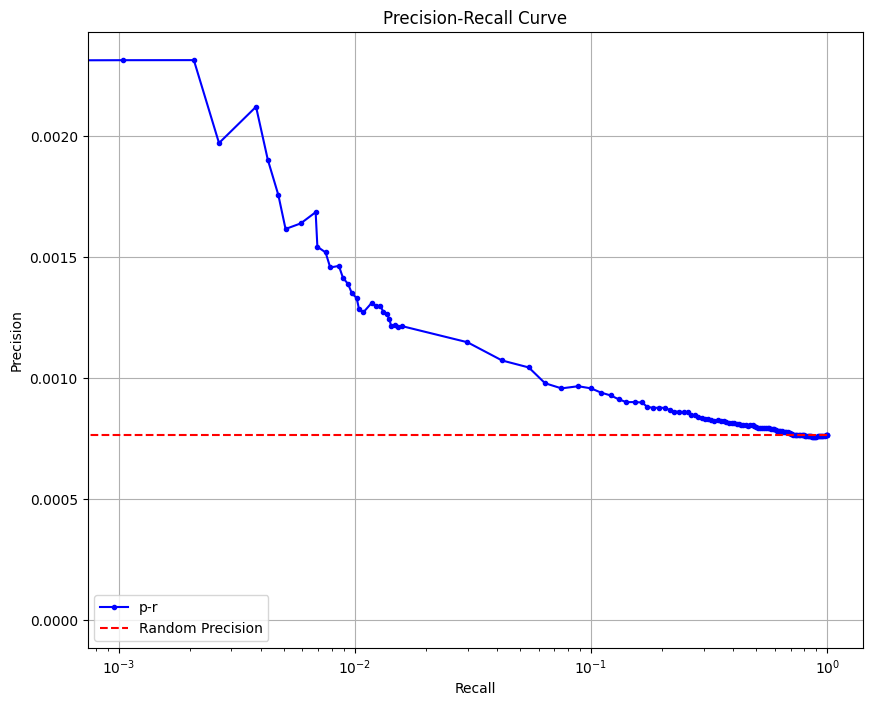

base enrichment
Top central genes: []


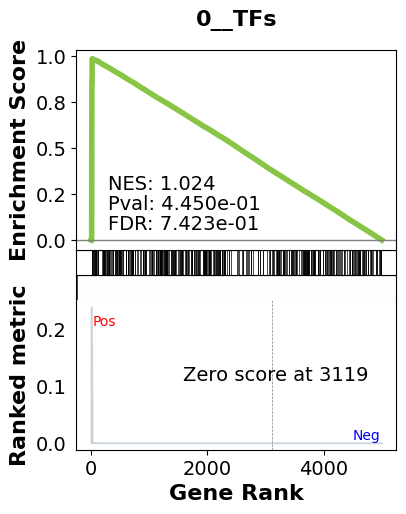

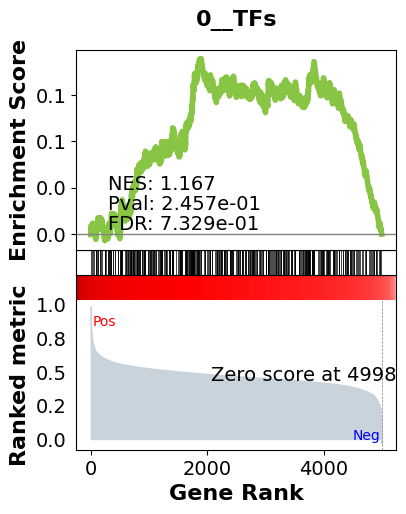

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3357 genes
intersection pct: 0.6714
precision:  0.0026612987727409657 
recall:  0.3759685440037007 
random precision: 0.0007675243553842805


 99%|█████████▉| 127/128 [00:02<00:00, 60.07it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.55it/s]


Average Precision (AP):  0.0018264503805827874
Area Under Precision-Recall Curve (AUPRC):  0.001598237819278734
EPR: 6.227143504774758


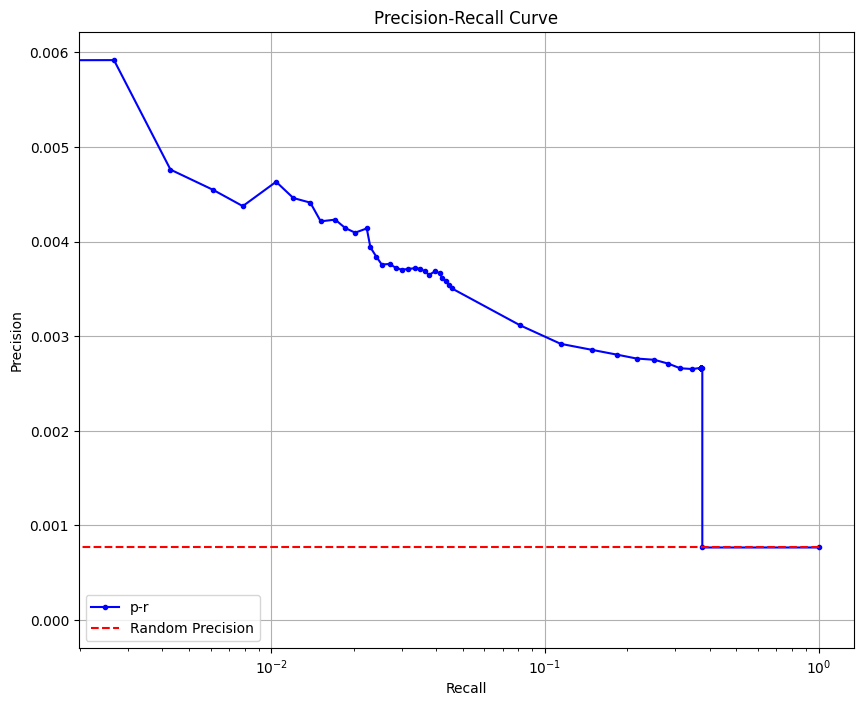

(51281, 23149)
4vX
save dir exist
epoch: 1 0.2199252676218748 mse_loss: 0.17976381815969944 kl_loss: 0.03947066992986947 sparse_loss: 0.0006907706083438825
epoch: 2 0.1943924380466342 mse_loss: 0.14884145092219114 kl_loss: 0.044672318152152 sparse_loss: 0.0008786616526776925
epoch: 4 0.1227818769402802 mse_loss: 0.07400223752483726 kl_loss: 0.04784125101286918 sparse_loss: 0.0009383878823427949
epoch: 5 0.12233239552006125 mse_loss: 0.0726501252502203 kl_loss: 0.04871556197758764 sparse_loss: 0.0009667072081356309
epoch: 7 0.11258113011717796 mse_loss: 0.0623234414961189 kl_loss: 0.04928093240596354 sparse_loss: 0.000976757572061615
epoch: 8 0.11216977145522833 mse_loss: 0.061868555610999465 kl_loss: 0.04932291083969176 sparse_loss: 0.0009783064961084165
epoch: 10 0.10476151900365949 mse_loss: 0.054424605099484324 kl_loss: 0.049359276541508734 sparse_loss: 0.0009776388978934847
epoch: 11 0.10466785868629813 mse_loss: 0.05439623142592609 kl_loss: 0.04929562553297728 sparse_loss: 0.00097

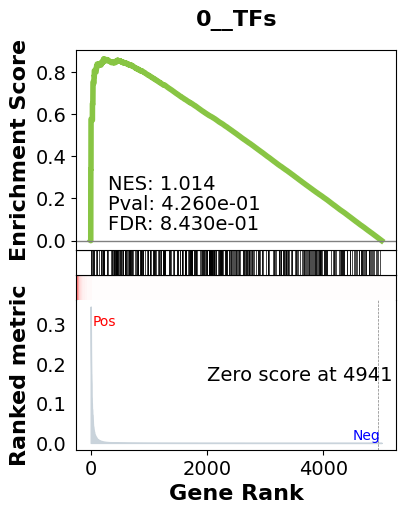

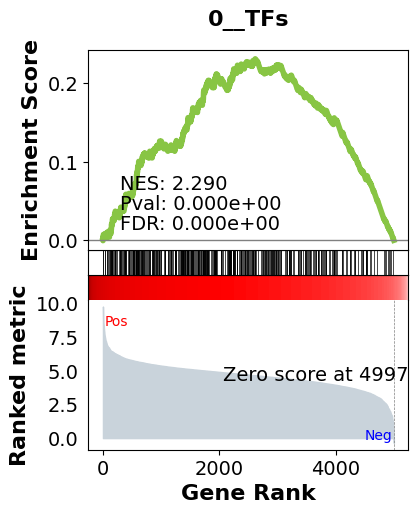

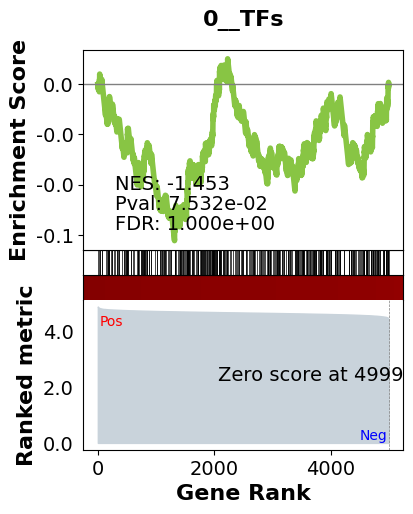

_________________________________________
TF specific enrichment
found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3521 genes
intersection pct: 0.7042
precision:  0.0006723457953577238 
recall:  0.9998800095992321 
random precision: 0.0006724264800805557


 98%|█████████▊| 125/128 [00:02<00:00, 47.29it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.65it/s]


Average Precision (AP):  0.0006973972138093256
Area Under Precision-Recall Curve (AUPRC):  0.0006955837436968864
EPR: 1.7863248549090984


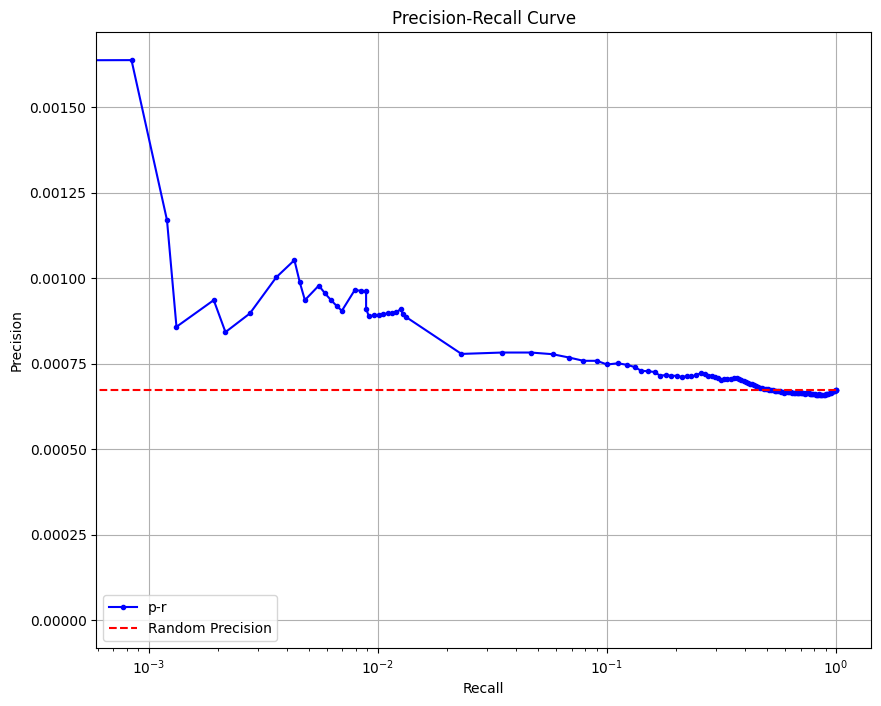

base enrichment
Top central genes: []


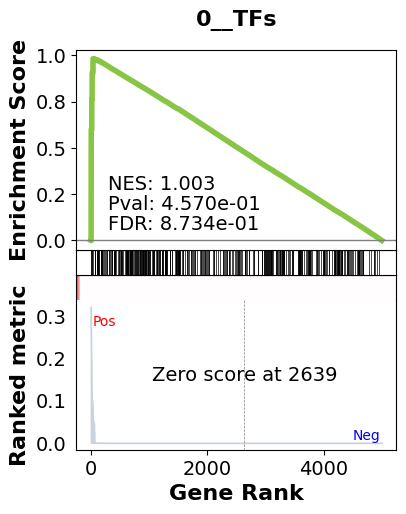

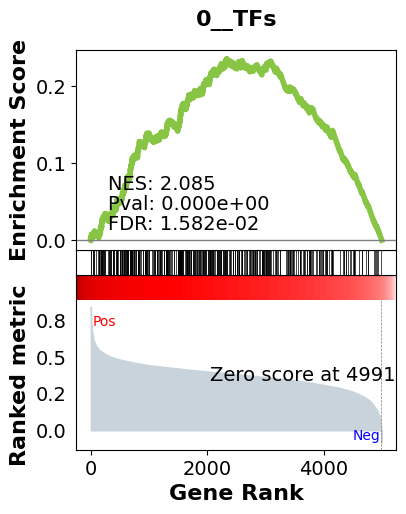

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3521 genes
intersection pct: 0.7042
precision:  0.0016901718073593073 
recall:  0.23986081113510918 
random precision: 0.0006724264800805557


 98%|█████████▊| 126/128 [00:02<00:00, 54.09it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.23it/s]


Average Precision (AP):  0.0010729487953745483
Area Under Precision-Recall Curve (AUPRC):  0.0009459163373193209
EPR: 3.4013709149907307


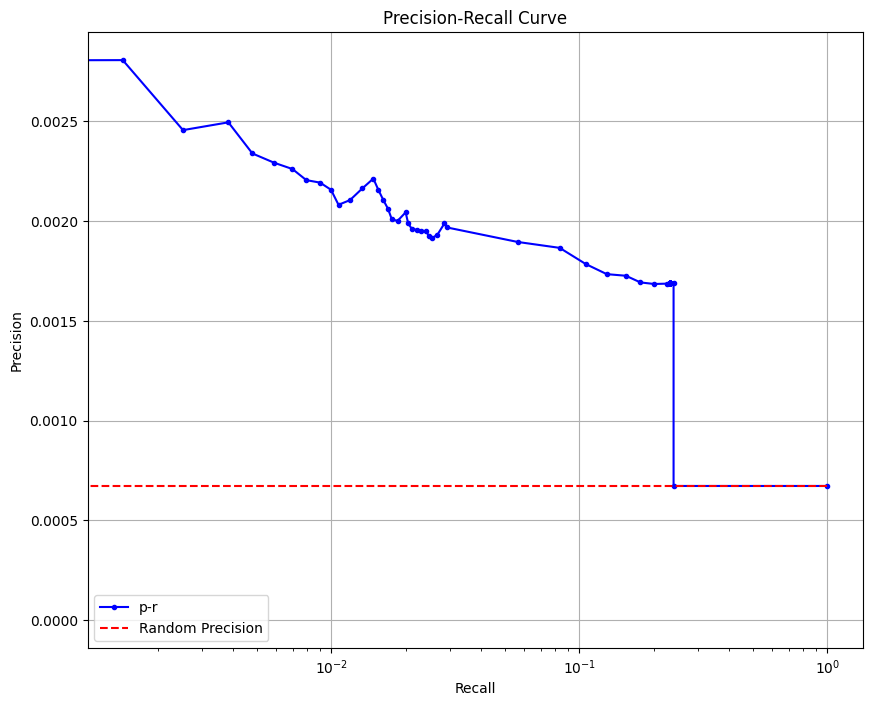

(51281, 23149)
pUh
save dir exist
epoch: 1 0.23363327886909246 mse_loss: 0.19359368458390236 kl_loss: 0.03935649068444036 sparse_loss: 0.0006830990823800676
epoch: 2 0.21081448160111904 mse_loss: 0.16488867346197367 kl_loss: 0.045067722676321864 sparse_loss: 0.0008580773828725796
epoch: 4 0.10232229297980666 mse_loss: 0.053772238781675696 kl_loss: 0.04763274302240461 sparse_loss: 0.0009173135949822608
epoch: 5 0.1027450286783278 mse_loss: 0.0530851730145514 kl_loss: 0.048709428519941866 sparse_loss: 0.0009504292756901123
epoch: 7 0.09682943345978856 mse_loss: 0.04644780489616096 kl_loss: 0.04941789910662919 sparse_loss: 0.0009637306720833294
epoch: 8 0.09652240388095379 mse_loss: 0.04600388277322054 kl_loss: 0.049550606636330485 sparse_loss: 0.0009679167997092009
epoch: 10 0.09213014366105199 mse_loss: 0.04151207976974547 kl_loss: 0.04964846256189048 sparse_loss: 0.0009696023516880814
epoch: 11 0.09260131232440472 mse_loss: 0.04197278153151274 kl_loss: 0.049658444127999246 sparse_loss:

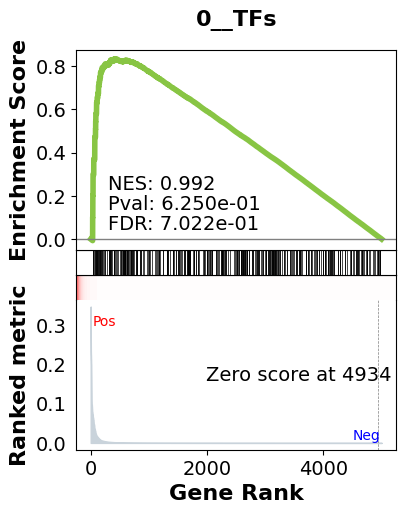

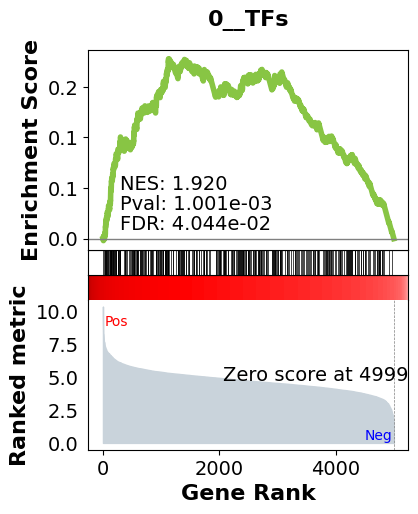

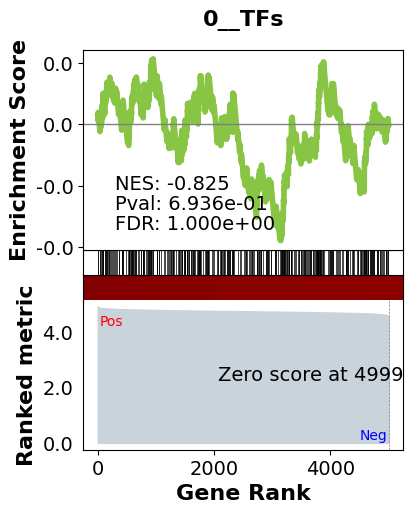

_________________________________________
TF specific enrichment
found some significant results for  6.0606060606060606 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3522 genes
intersection pct: 0.7044
precision:  0.0007681662116213242 
recall:  0.9998950351632203 
random precision: 0.0007682468505265962


 98%|█████████▊| 126/128 [00:02<00:00, 55.00it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.65it/s]


Average Precision (AP):  0.0008238393497283353
Area Under Precision-Recall Curve (AUPRC):  0.0008225630940272921
EPR: 1.7783002392190674


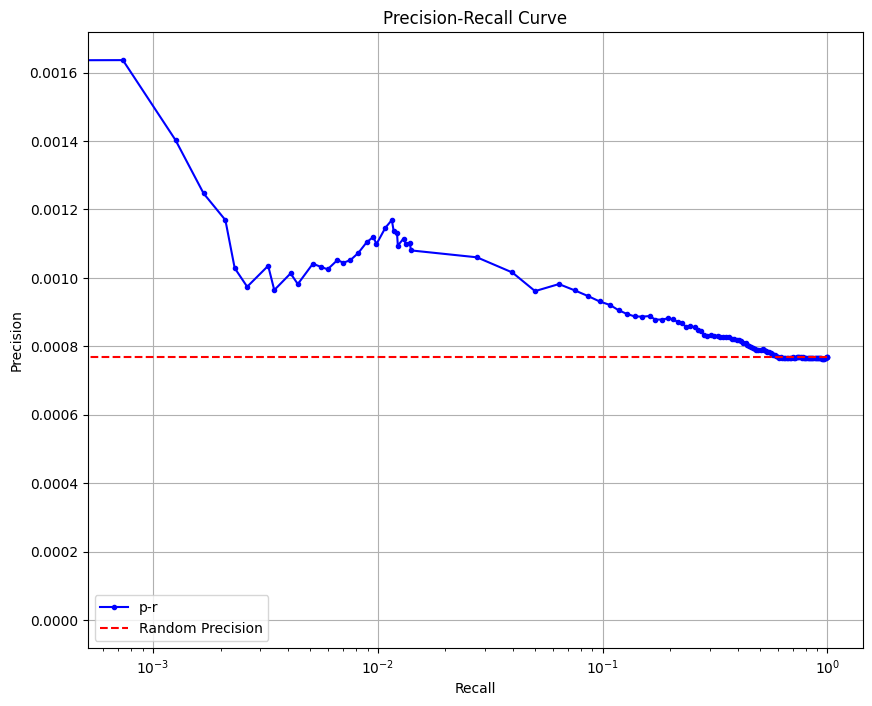

base enrichment
Top central genes: []


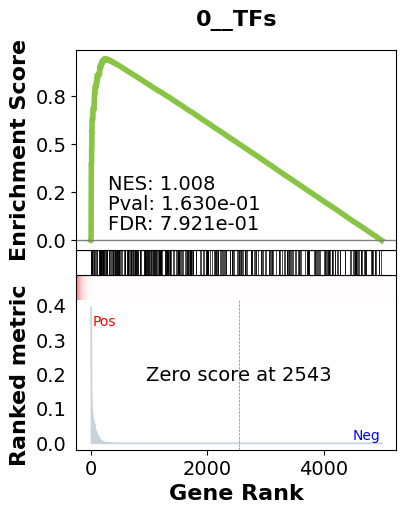

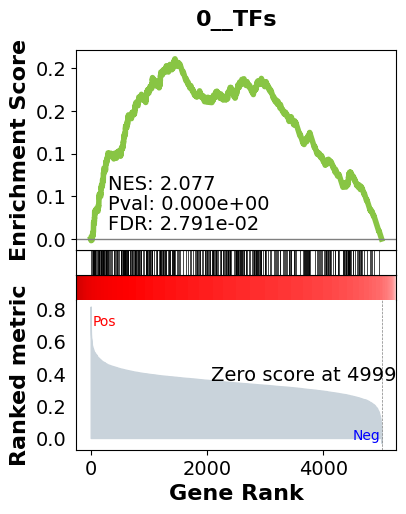

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3522 genes
intersection pct: 0.7044
precision:  0.0028353687399413044 
recall:  0.31436968615513805 
random precision: 0.0007682468505265962


 98%|█████████▊| 126/128 [00:02<00:00, 55.68it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.13it/s]


Average Precision (AP):  0.0016902985924438722
Area Under Precision-Recall Curve (AUPRC):  0.0015013596252538945
EPR: 5.0869582090182


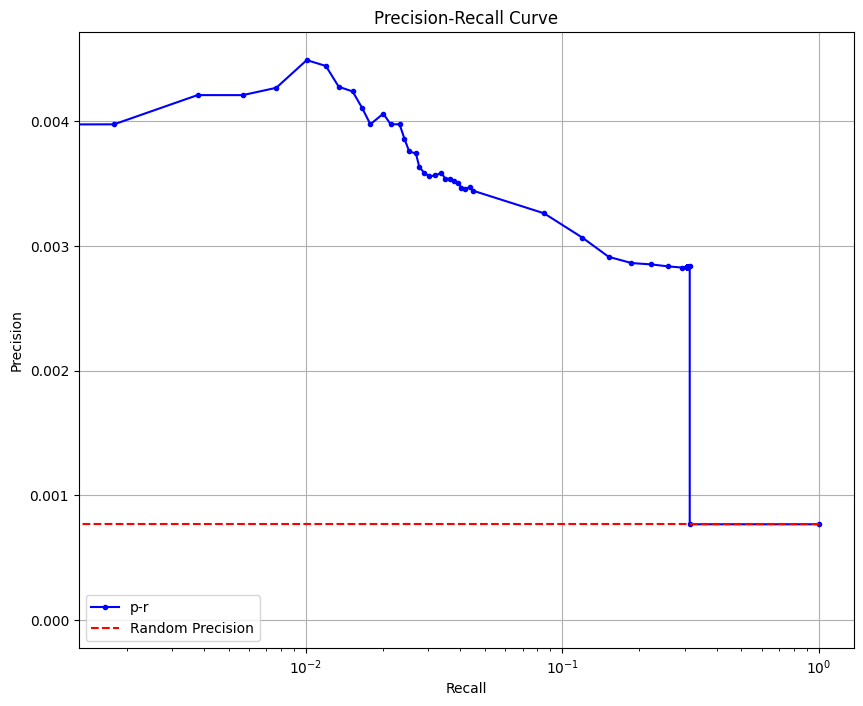

(51281, 23149)
BV5
save dir exist
epoch: 1 0.23238521069288254 mse_loss: 0.19452210422605276 kl_loss: 0.03713472236995585 sparse_loss: 0.0007283844861376565
epoch: 2 0.2032515611499548 mse_loss: 0.16017892863601446 kl_loss: 0.04211267293430865 sparse_loss: 0.0009599538716429379
epoch: 4 0.09969412861391902 mse_loss: 0.05023290659300983 kl_loss: 0.04843377985525876 sparse_loss: 0.0010274440719513223
epoch: 5 0.09908633260056376 mse_loss: 0.048940588952973485 kl_loss: 0.04909494915045798 sparse_loss: 0.0010507946280995384
epoch: 7 0.09485433483496308 mse_loss: 0.044034990132786334 kl_loss: 0.04976125922985375 sparse_loss: 0.0010580880698398687
epoch: 8 0.09469511732459068 mse_loss: 0.0439086303813383 kl_loss: 0.04972866689786315 sparse_loss: 0.0010578204892226495
epoch: 10 0.09169521881267428 mse_loss: 0.04082206217572093 kl_loss: 0.04981795174535364 sparse_loss: 0.00105520569923101
epoch: 11 0.09059727424755692 mse_loss: 0.03985475958324969 kl_loss: 0.0496907124761492 sparse_loss: 0.001

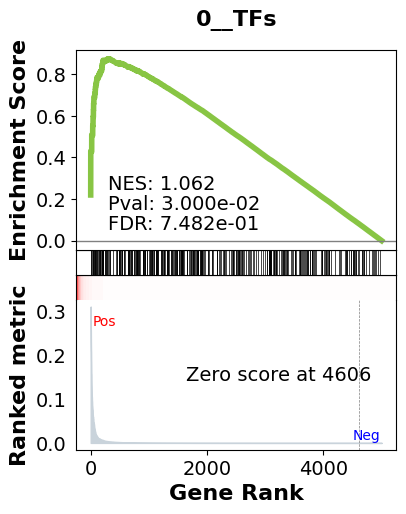

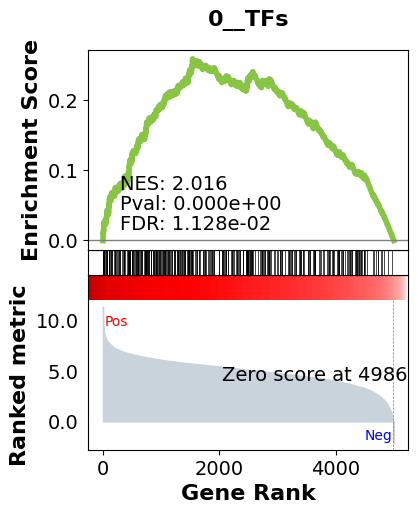

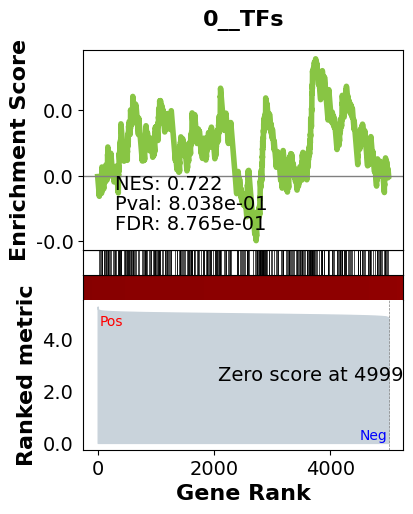

_________________________________________
TF specific enrichment
found some significant results for  11.538461538461538 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3550 genes
intersection pct: 0.71
precision:  0.0010245298219296053 
recall:  0.9997676399969019 
random precision: 0.0010247679370106238


 99%|█████████▉| 127/128 [00:03<00:00, 43.71it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 35.08it/s]


Average Precision (AP):  0.0010547298535350852
Area Under Precision-Recall Curve (AUPRC):  0.0010531416625318038
EPR: 1.2856344867237746


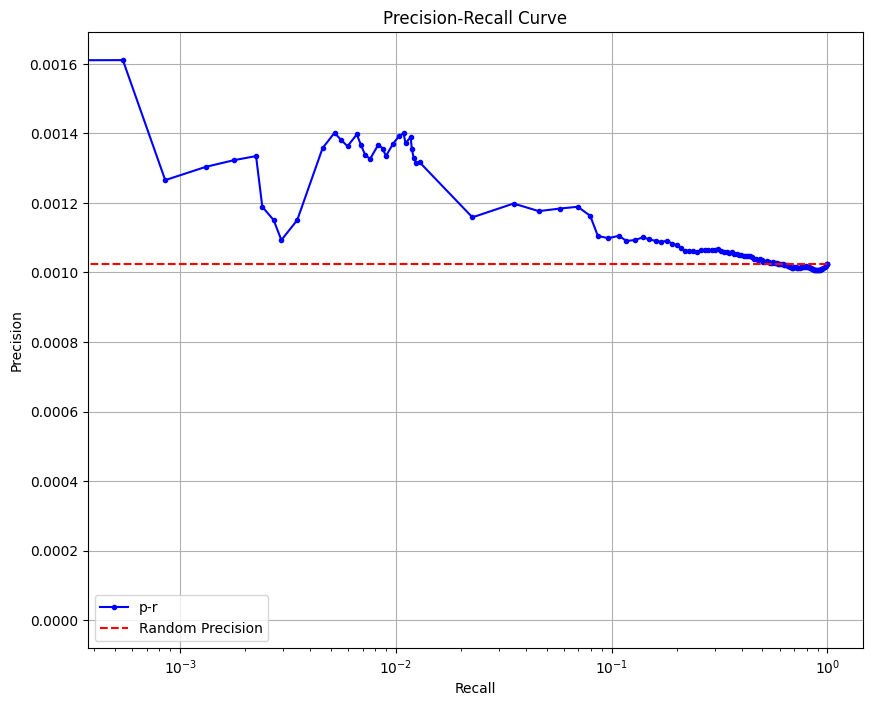

base enrichment
Top central genes: []


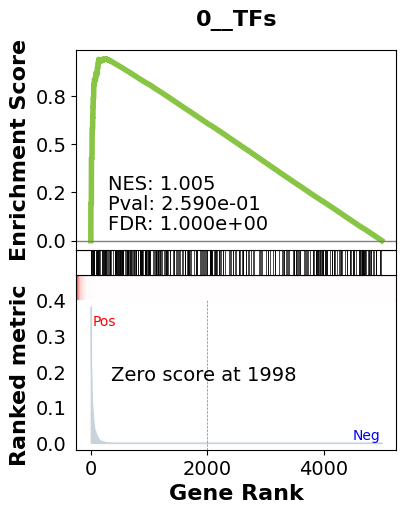

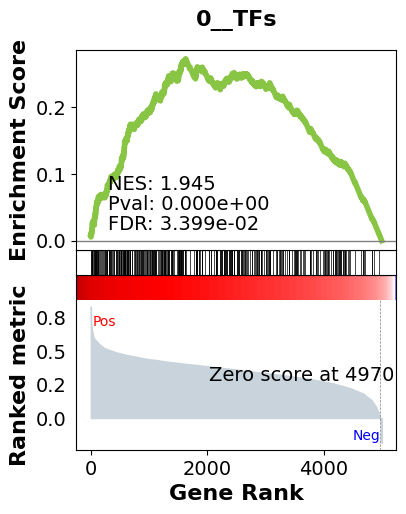

_________________________________________
TF specific enrichment
found some significant results for  11.538461538461538 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3550 genes
intersection pct: 0.71
precision:  0.0037747876335518203 
recall:  0.31647432421965765 
random precision: 0.0010247679370106238


 98%|█████████▊| 125/128 [00:02<00:00, 45.01it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.49it/s]


Average Precision (AP):  0.0022134465983919423
Area Under Precision-Recall Curve (AUPRC):  0.0019417483265124888
EPR: 5.183482460015542


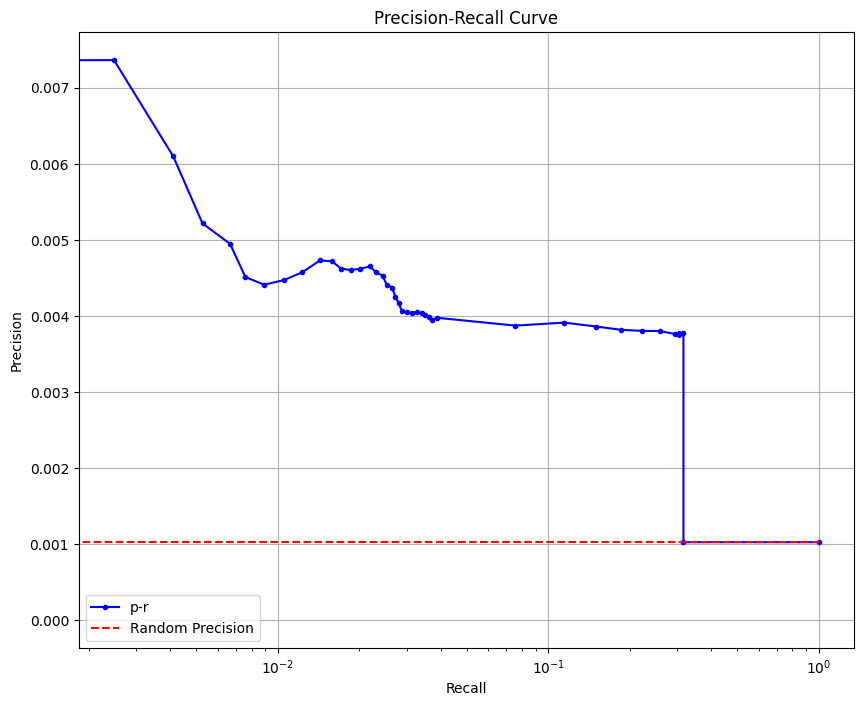

(51281, 23149)
8Fp
save dir exist
epoch: 1 0.6933171600103378 mse_loss: 0.6672941073775291 kl_loss: 0.02572121808771044 sparse_loss: 0.0003018185670953244
epoch: 2 0.6934210881590843 mse_loss: 0.6673709750175476 kl_loss: 0.02571249453467317 sparse_loss: 0.000337595625751419
epoch: 4 0.45690859854221344 mse_loss: 0.4264880008995533 kl_loss: 0.030049639171920717 sparse_loss: 0.0003709598931891378
epoch: 5 0.45224615186452866 mse_loss: 0.4217948280274868 kl_loss: 0.03004377498291433 sparse_loss: 0.0004075638462381903
epoch: 7 0.26932066306471825 mse_loss: 0.2349019180983305 kl_loss: 0.03391356603242457 sparse_loss: 0.0005051849548181053
epoch: 8 0.22111142985522747 mse_loss: 0.18446705676615238 kl_loss: 0.03599277441389859 sparse_loss: 0.000651595437375363
epoch: 10 0.11805953737348318 mse_loss: 0.0765522844158113 kl_loss: 0.04075217549689114 sparse_loss: 0.0007550762456958182
epoch: 11 0.11108148004859686 mse_loss: 0.0678109317086637 kl_loss: 0.0424455392640084 sparse_loss: 0.00082501010

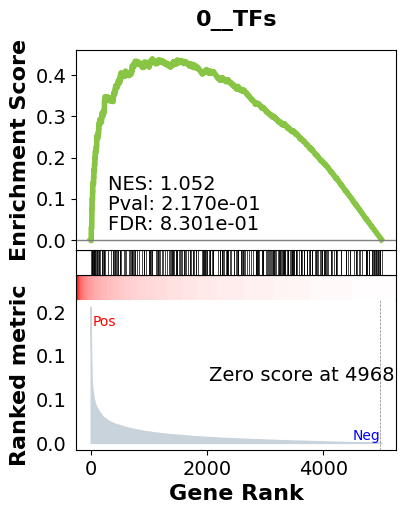

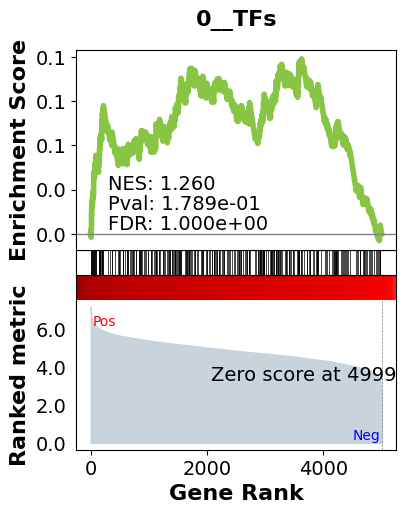

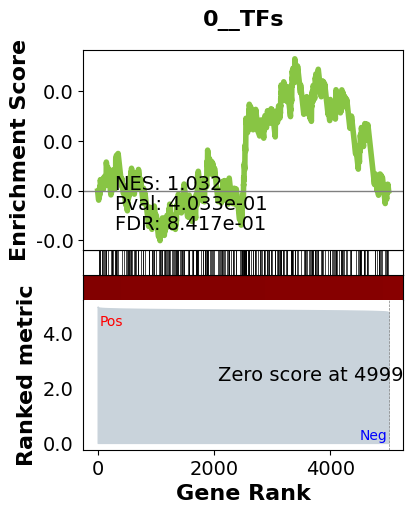

_________________________________________
TF specific enrichment
found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0009533432524261064 
recall:  0.9998447325518205 
random precision: 0.0009534912985868993


 97%|█████████▋| 124/128 [00:02<00:00, 42.55it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 42.88it/s]


Average Precision (AP):  0.0009729294062638822
Area Under Precision-Recall Curve (AUPRC):  0.0009723440381465908
EPR: 1.1401913662691163


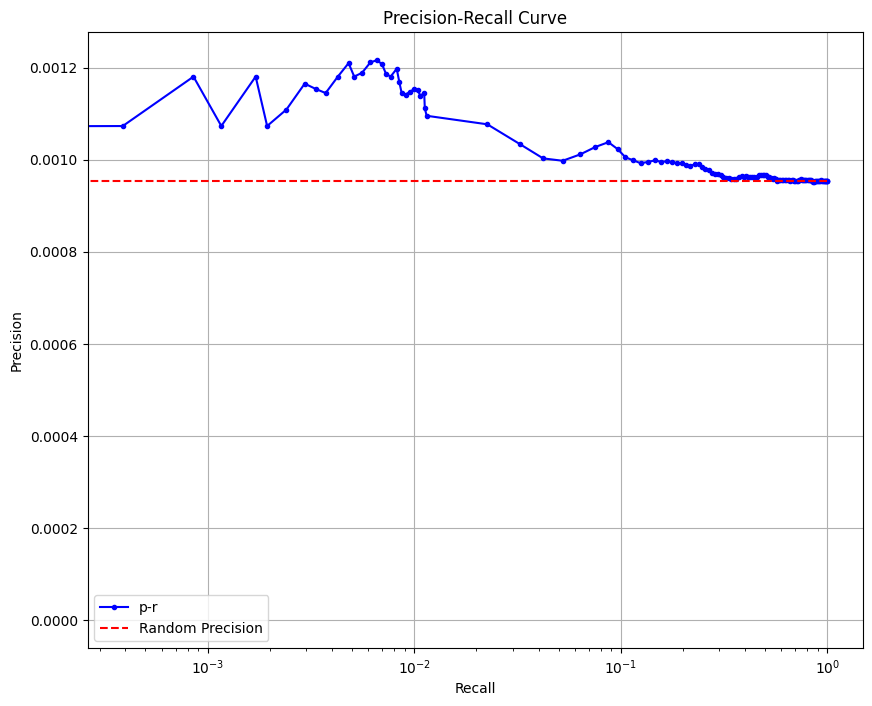

base enrichment
PowerIterationFailedConvergence


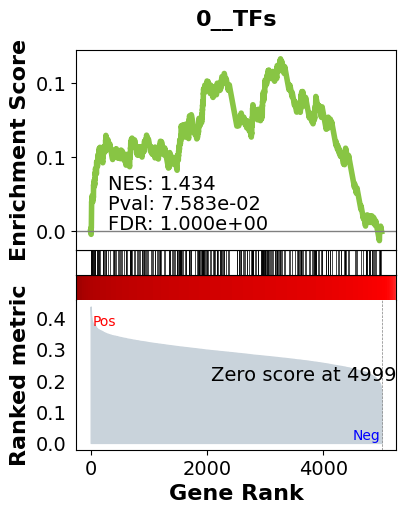

_________________________________________
TF specific enrichment
found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0031297770073280278 
recall:  0.23127086406334912 
random precision: 0.0009534912985868993


 98%|█████████▊| 125/128 [00:02<00:00, 41.72it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 41.97it/s]


Average Precision (AP):  0.0016642267325991224
Area Under Precision-Recall Curve (AUPRC):  0.001473601343701771
EPR: 4.012479437657026


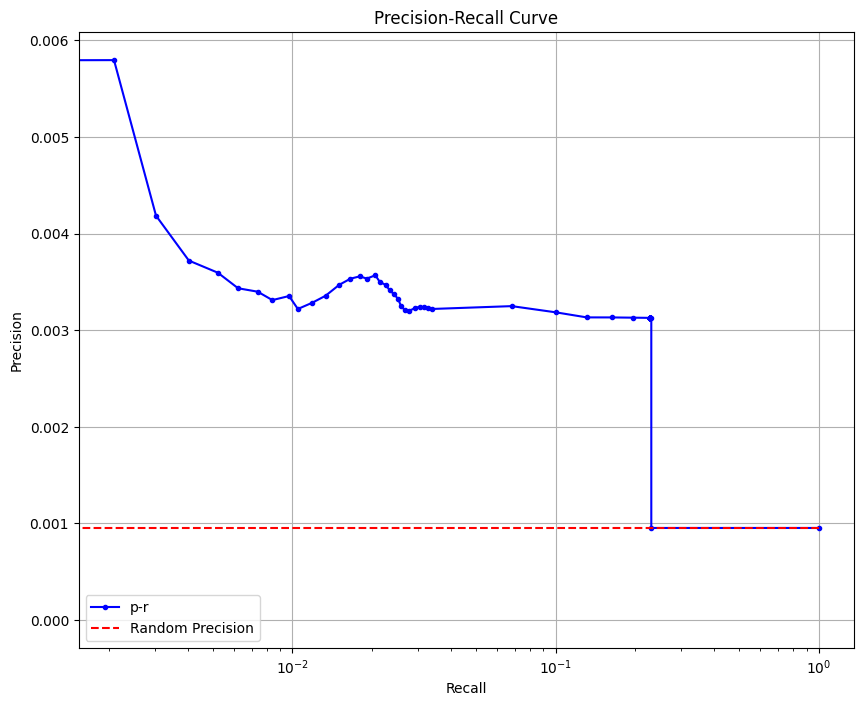

(51281, 23149)
xhC
save dir exist
epoch: 1 0.9930892586708069 mse_loss: 0.9694376140832901 kl_loss: 0.023320406697166618 sparse_loss: 0.0003312163316877559
epoch: 2 0.9954718500375748 mse_loss: 0.9717131406068802 kl_loss: 0.02336401080538053 sparse_loss: 0.00039469489274779335
epoch: 4 0.7475308179855347 mse_loss: 0.7214221954345703 kl_loss: 0.0255988534190692 sparse_loss: 0.0005097532557556406
epoch: 5 0.7239516824483871 mse_loss: 0.6960969120264053 kl_loss: 0.027183764497749507 sparse_loss: 0.0006710002780891955
epoch: 7 0.25932395085692406 mse_loss: 0.2233375646173954 kl_loss: 0.03518506162799895 sparse_loss: 0.000801329908426851
epoch: 8 0.24537736922502518 mse_loss: 0.20664042606949806 kl_loss: 0.03782290127128363 sparse_loss: 0.000914037082111463
epoch: 10 0.11917558498680592 mse_loss: 0.07544214650988579 kl_loss: 0.042754351161420345 sparse_loss: 0.0009790912008611485
epoch: 11 0.11719892732799053 mse_loss: 0.07220526412129402 kl_loss: 0.04396956553682685 sparse_loss: 0.00102410

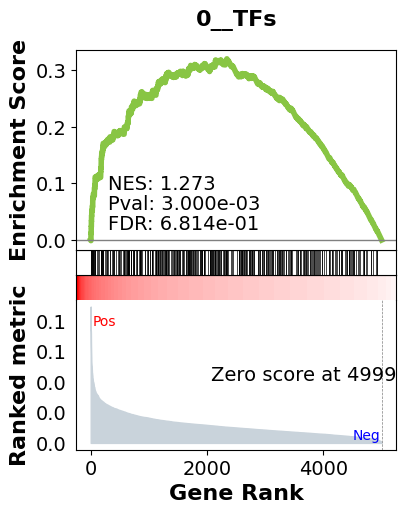

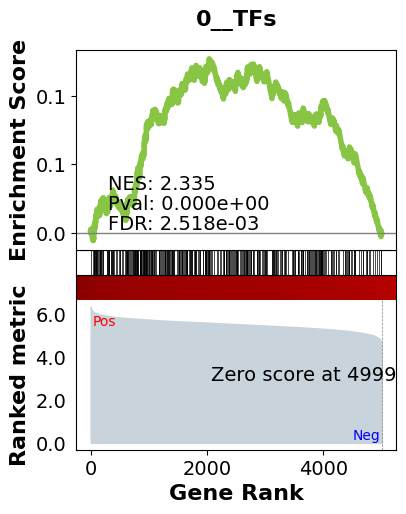

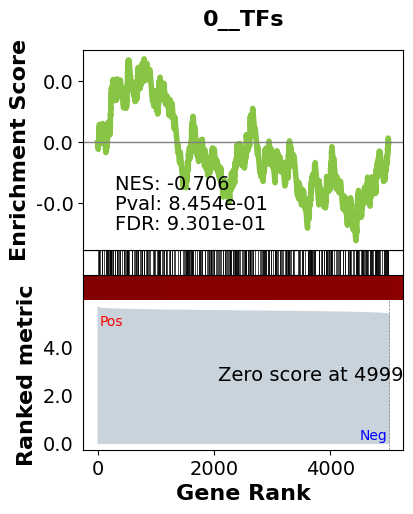

_________________________________________
TF specific enrichment
found some significant results for  8.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3645 genes
intersection pct: 0.729
precision:  0.0014318217066519705 
recall:  0.9998948475289169 
random precision: 0.0014319722820759532


 97%|█████████▋| 124/128 [00:03<00:00, 44.94it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 33.83it/s]


Average Precision (AP):  0.0014345792535692403
Area Under Precision-Recall Curve (AUPRC):  0.0014273555567401492
EPR: 1.101799650102698


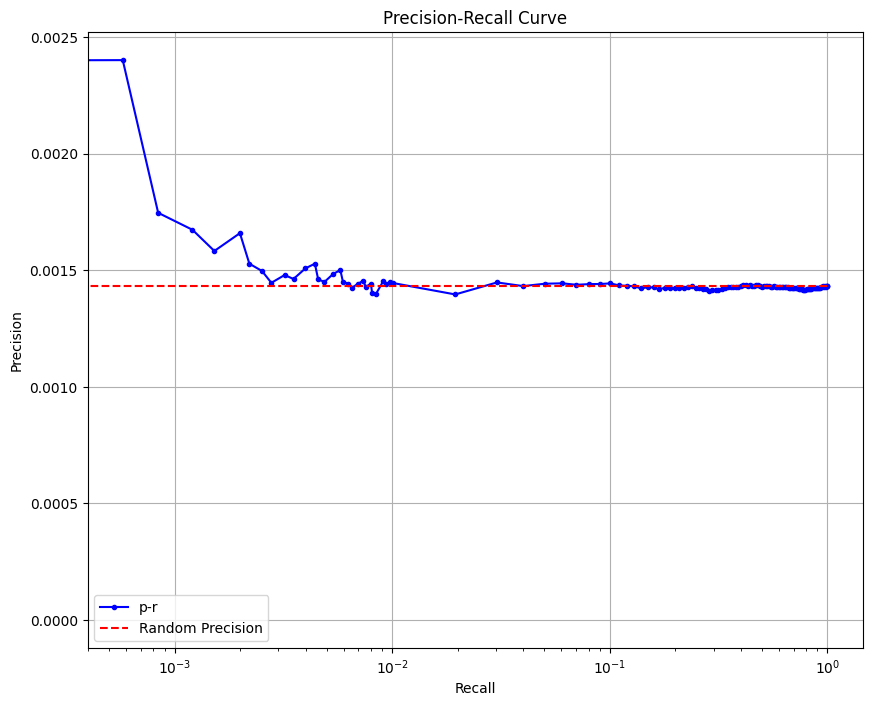

base enrichment
Top central genes: []


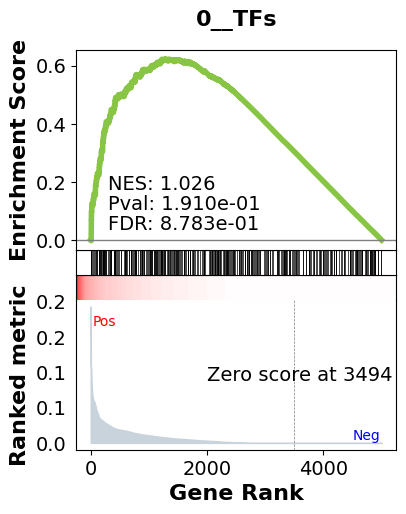

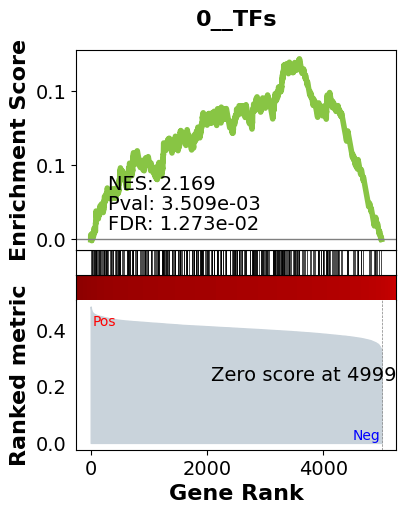

_________________________________________
TF specific enrichment
found some significant results for  2.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3645 genes
intersection pct: 0.729
precision:  0.006646491284710776 
recall:  0.4113038906414301 
random precision: 0.0014319722820759532


 98%|█████████▊| 125/128 [00:02<00:00, 48.44it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.58it/s]


Average Precision (AP):  0.00421632794011616
Area Under Precision-Recall Curve (AUPRC):  0.0036384061776167913
EPR: 5.654929020733356


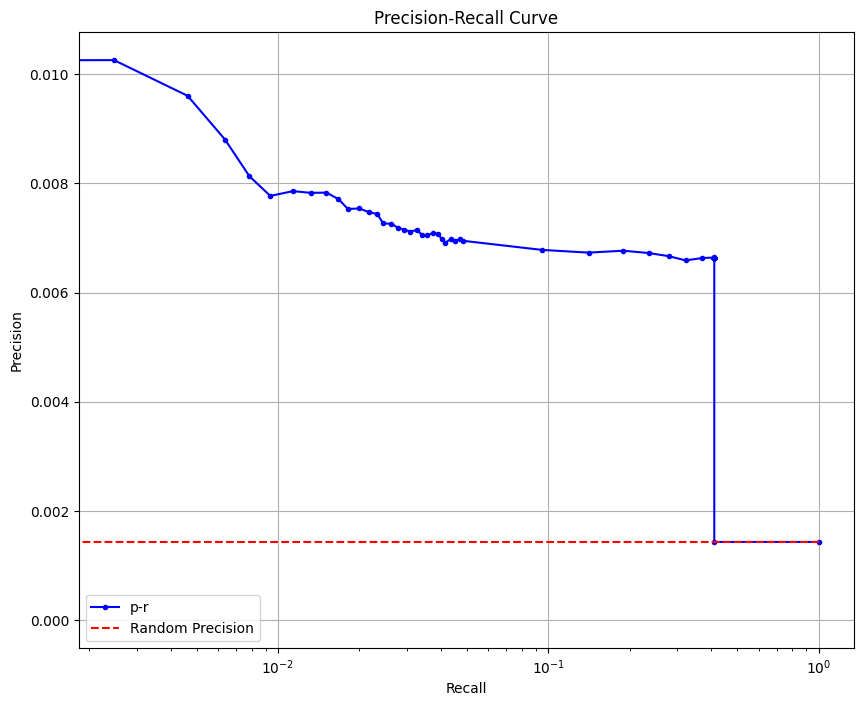

(51281, 23149)
8hK
save dir exist
epoch: 1 0.9768082797527313 mse_loss: 0.9527969211339951 kl_loss: 0.02365741241374053 sparse_loss: 0.000353934068698436
epoch: 2 0.966417208313942 mse_loss: 0.9420037418603897 kl_loss: 0.02396641370432917 sparse_loss: 0.00044703616003971547
epoch: 4 0.6090545207262039 mse_loss: 0.5794705003499985 kl_loss: 0.02899386774515733 sparse_loss: 0.0005901119948248379
epoch: 5 0.5815865844488144 mse_loss: 0.5483863353729248 kl_loss: 0.03244862030260265 sparse_loss: 0.0007516189070884138
epoch: 7 0.2042090706527233 mse_loss: 0.16463860869407654 kl_loss: 0.03871940774843097 sparse_loss: 0.0008510519546689466
epoch: 8 0.2023426741361618 mse_loss: 0.16029846295714378 kl_loss: 0.0411117821931839 sparse_loss: 0.000932421229663305
epoch: 10 0.11308144219219685 mse_loss: 0.06794197671115398 kl_loss: 0.04415755998343229 sparse_loss: 0.0009819065890042111
epoch: 11 0.11686360277235508 mse_loss: 0.07051453366875648 kl_loss: 0.0453308904543519 sparse_loss: 0.00101817963877

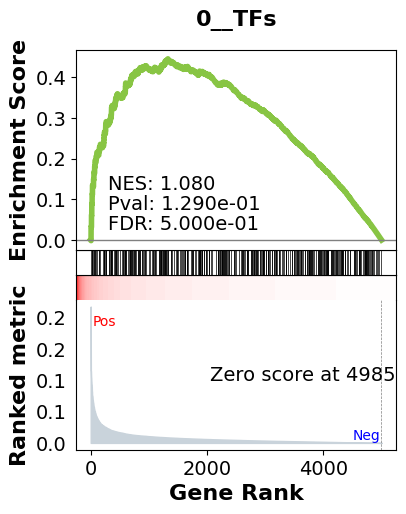

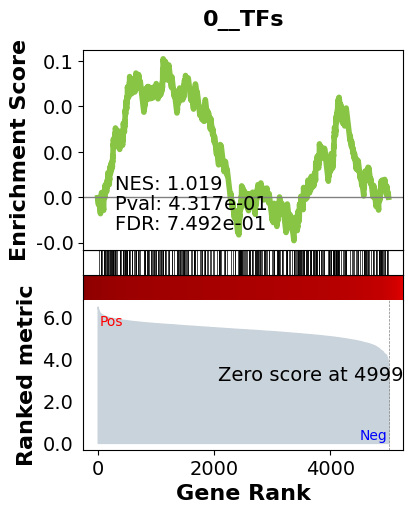

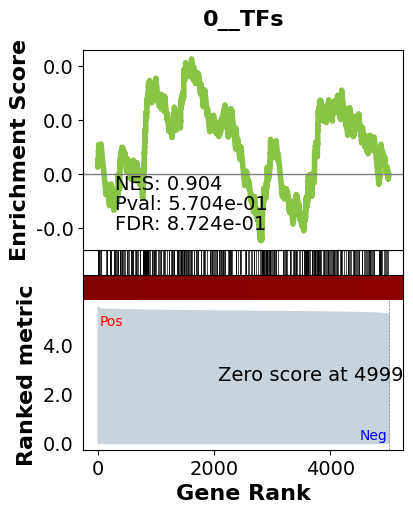

_________________________________________
TF specific enrichment
found some significant results for  4.545454545454546 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3764 genes
intersection pct: 0.7528
precision:  0.0018325419805743208 
recall:  0.9998459167950693 
random precision: 0.0018328243880301035


 98%|█████████▊| 126/128 [00:03<00:00, 38.32it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 38.09it/s]


Average Precision (AP):  0.001916484053575711
Area Under Precision-Recall Curve (AUPRC):  0.0019151371948180318
EPR: 1.6431994256911802


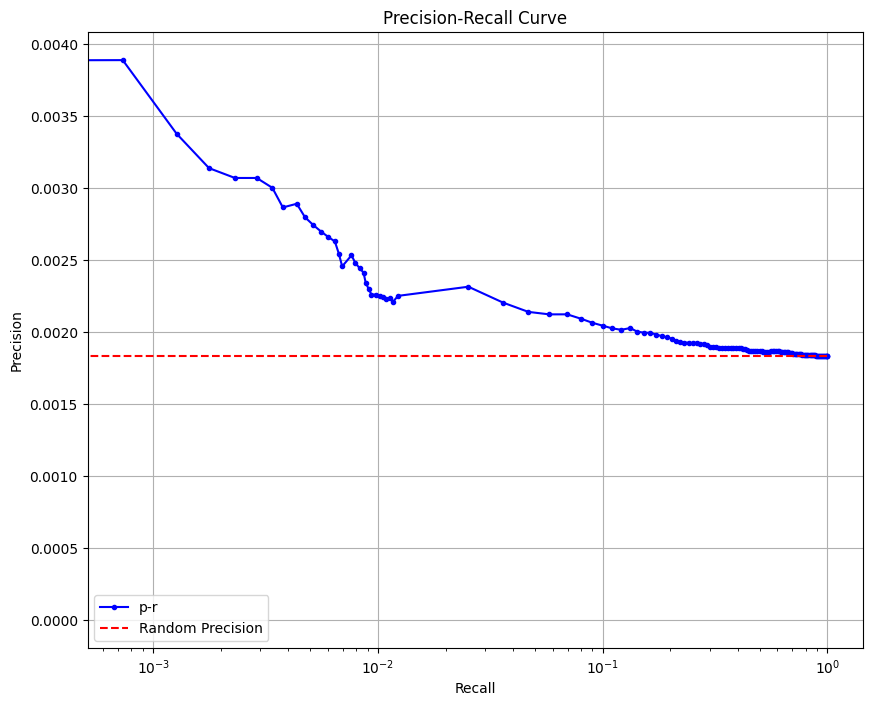

base enrichment
Top central genes: []


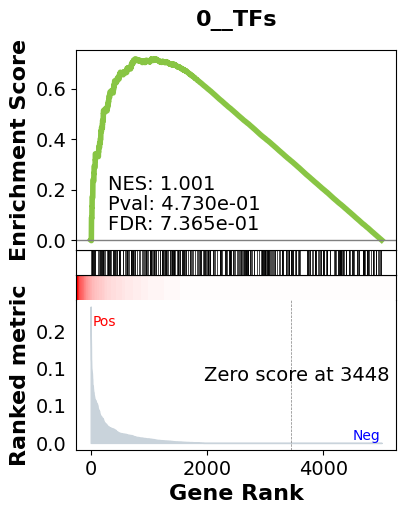

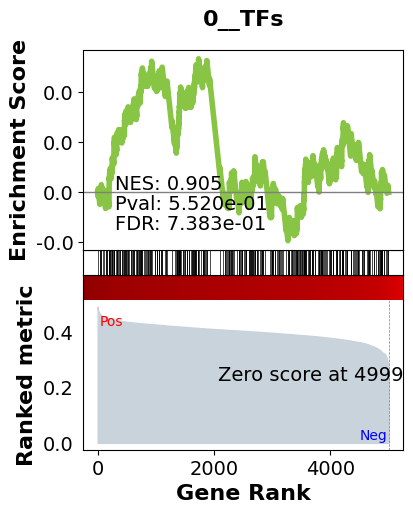

_________________________________________
TF specific enrichment
found some significant results for  4.545454545454546 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3764 genes
intersection pct: 0.7528
precision:  0.009203675547447247 
recall:  0.4549306625577812 
random precision: 0.0018328243880301035


 98%|█████████▊| 125/128 [00:03<00:00, 36.10it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 35.93it/s]


Average Precision (AP):  0.006160031976802431
Area Under Precision-Recall Curve (AUPRC):  0.005471248302066837
EPR: 7.332118288321562


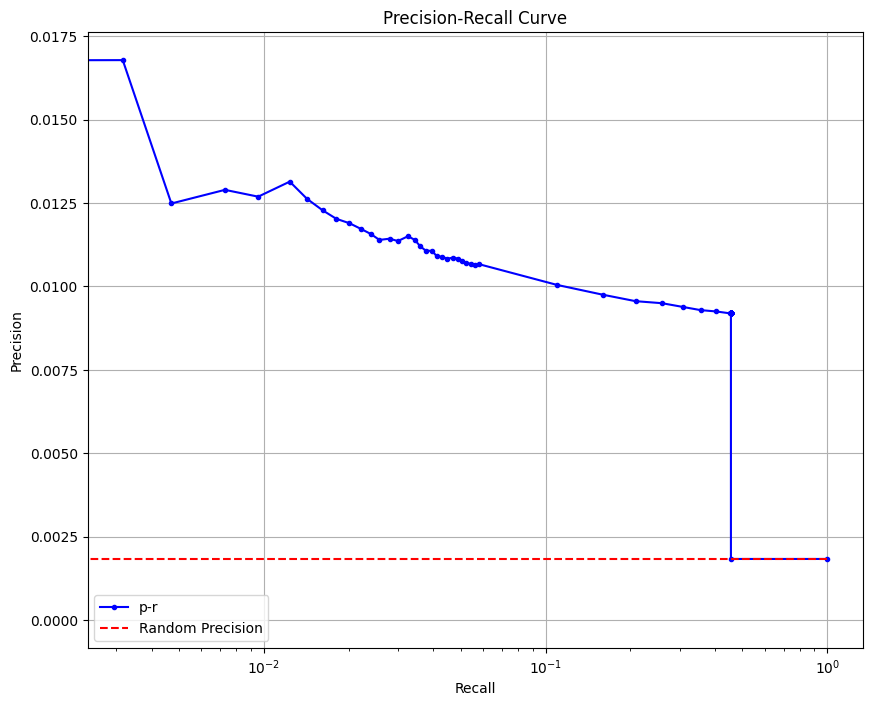

In [7]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
print(adata.shape)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=True, max_value=None)
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(subadata.shape)
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['deepsem_tf_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [8]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [9]:
metrics

{'deepsem_retinal rod cell': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Rod photoreceptor cells',
   'celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Retinal progenitor cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Ciliated cells'],
  'enriched_terms_Targets': ['celltype.gmt__Rod photoreceptor cells',
   'celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Airway goblet cells',
   'celltype.gmt__Pulmonary alveolar type II cells',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Smooth muscle cells',
   'celltype.gmt__Cone bipolar cells',
   '0__TFs',
   'celltype.gmt__Ciliated cells',
   'celltype.gmt__Myocytes'],
  'significant_enriched_TFtargets': 40.0,
  'precision': 0.00023413490105341032,
  'recall': 1.0,
  'rand_precision': 0.00023413490105341032,
  'auprc': 0.0003395988072

In [10]:
True
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
True


True

In [11]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,retinal rod cell,5.137229,0.000340,0.000234,40.000000,True,False
1,retinal rod cell,5.137229,0.000891,0.000234,0.000000,True,False
2,Mueller cell,2.973925,0.001480,0.001377,15.517241,False,False
3,Mueller cell,9.195226,0.003729,0.001377,3.448276,False,False
4,amacrine cell,1.954520,0.000822,0.000820,7.142857,True,False
5,amacrine cell,6.603132,0.001444,0.000820,0.000000,True,False
6,ON-bipolar cell,3.022855,0.000838,0.000768,0.000000,False,False
7,ON-bipolar cell,6.227144,0.001598,0.000768,0.000000,False,False
8,rod bipolar cell,1.786325,0.000696,0.000672,14.285714,True,False
9,rod bipolar cell,3.401371,0.000946,0.000672,0.000000,True,False


: 